In [1]:
######## BROADBAND ########

# simple single-screen scattering
# rays are launched at random angles with the same phase
# scattering screen focuses rays back to a common position

import numpy as np
import matplotlib.pyplot as plt

In [10]:
# parameters

N = 200 #number of rays
D = 3.086e19 #1000 parsec in meters
s = 0.5 #ratio of position of screen (0.5 - middle, 0.8 - 0.8 D away from pulsar)
c0 = 300000000 #light speed in m/s
wavevector = 2*np.pi/c0 * np.arange(3e8,3.5e8,1e5) #corresponding to frequency of 300MHz (wavelength of 1m)
timesteps = 500

# velocity = 9.7e-13 # corresponding to 300 km/s
velocity = 5e-11 # radians per second

<ipython-input-11-ee977d8b59db>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_label_list);


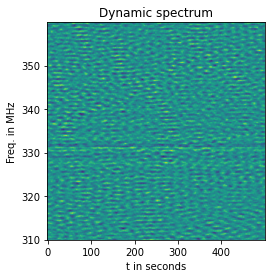

In [11]:
angles_x = np.zeros(N)
angles_y = np.zeros(N)


for i in np.arange(N):
    angles_x[i] = np.random.normal(0,5e-7) #generating random angles centered around 0 with standard deviation of 10 mas
    
for j in np.arange(N):
    angles_y[j] = np.random.normal(0,5e-8) 
    
amplitudes_2D = []

for k in wavevector:
    
    amplitudes_1D = []
    angles_x_new = 0
    
    for t in range(timesteps): 
        angles_x_new = angles_x - velocity*t
        paths = D / np.cos(np.sqrt(angles_x_new**2 + angles_y**2))
        phases = k * paths
        amplitude = np.cos(phases) 
    
        interference = 0
        for a in amplitude:
            interference += a
    
        amplitudes_1D.append(interference)
        t_delays = (paths - D)/c0
        x = np.arange(0,timesteps)
        
    amplitudes_2D.append(amplitudes_1D)    

    
prim, ax = plt.subplots(1,1)
    
plot1 = plt.figure(1)
prim = plt.imshow(amplitudes_2D)

plt.title("Dynamic spectrum")
plt.xlabel("t in seconds")
plt.ylabel("Freq. in MHz")
ax.invert_yaxis()

y_label_list = [300,310,320,330,340,350];

ax.set_yticklabels(y_label_list);

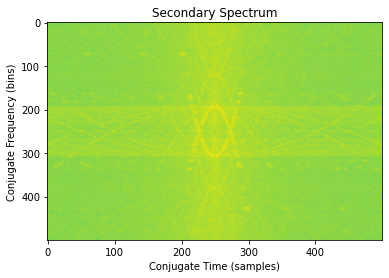

In [12]:
# Generate Secondary Spectrum

secfft = np.fft.fftn((amplitudes_2D)-np.mean(amplitudes_2D))
secreal = np.absolute(np.fft.fftshift(secfft))**2
secspec = 10*np.log10(secreal/np.max(secreal))

fig = plt.figure()
plt.imshow(secspec, aspect = 'auto')
plt.title('Secondary Spectrum')
plt.xlabel('Conjugate Time (samples)')
plt.ylabel('Conjugate Frequency (bins)')
plt.show()